<a href="https://colab.research.google.com/github/arwa-mili/Coolab/blob/main/Detect_age_from_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use this code snippet to suppress all 'librosa' related UserWarnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import librosa
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


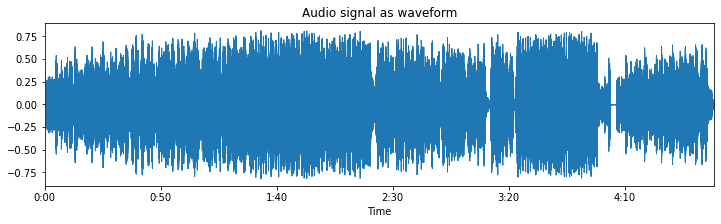

In [ ]:
# Loads mp3 file with a specific sampling rate, here 16kHz
y, sr = librosa.load("drive/MyDrive/exemp1.mp3", sr=16_000)
import librosa.display
plt.figure(figsize=(12, 3))
plt.title("Audio signal as waveform")
librosa.display.waveplot(y, sr=sr);

#1.1. Waveform - signal in the time-domain
####Before we called it time-series data, but now we name it waveform? Well, it's both. This becomes clearer when we look only at a small segment of this audio file. The following illustration shows the same thing as above, but this time only 62.5 milliseconds of it.




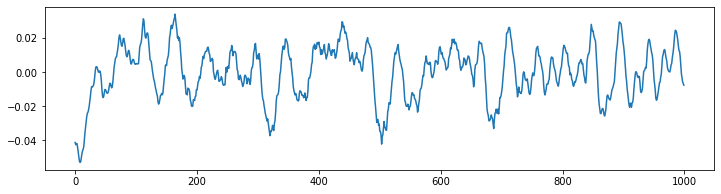

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(y[17500:18500])
plt.show();

####What you can see is a temporal signal that oscillates around the value 0 with different frequencies and amplitudes.This signal represents the air pressure change over time, or the physical displacement of a loud speaker’s membrane (or the membrane in your ear for that matter). That’s why this depiction of the audio data is also called waveform.

####The frequency is the speed with which this signal oscillates. Low frequency, e.g. 60 Hz could be the sound of bass guitar, while a birds song could be in the higher frequency of 8000 Hz. Human speech is usually anywhere between that.

####To know how quickly this signal needs to be interpret, we also need to know the sampling rate at which the data was recorded. In this case, the sampling rate per second was 16’000 or 16k Hz. Which means that the 1’000 time points we can see in the previous figure represents 62.5 milliseconds (1000/16000 = 0.0625) of audio signal.

#1.2. The Fourier Transform - signal in the frequency domain
####While the previous visualization can tell us when something happens (i.e. around 2 seconds there seem to be a lot of waveforms), it cannot really tell us with what frequency it happens. Because the waveform shows us information about the when, this signal is also said to be in the time domain. Using a fast fourier transformation, we can invert this issue and get a clear information about what frequencies are present, while loosing all information about the when. In such a case, the signal representation is said to be in the frequency domain.
####Let’s see what our spoken sentence from before looks like represented in the frequency domain.

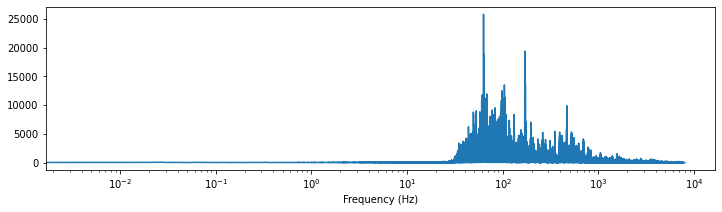

In [ ]:
import scipy
import numpy as np

# Applies fast fourier transformation to the signal and takes absolute values
y_freq = np.abs(scipy.fftpack.fft(y))

# Establishes all possible frequency (dependent on the sampling rate and the length of the signal)
f = np.linspace(0, sr, len(y_freq))

# Plot audio signal as frequency information.
plt.figure(figsize=(12, 3))
plt.semilogx(f[: len(f) // 2], y_freq[: len(f) // 2])
plt.xlabel("Frequency (Hz)")
plt.show();

####What you can see here is that most of the signal is somewhere between ~100 and ~1000 Hz (i.e. between 10^2 and 10^3 ). Plus there seem to be some additional stuff from 1'000 to 10'000 Hz.

#1.3. Spectrogram
####Luckily, we don't always need to decide for either the time or frequency domain. Using a spectrogram plot, we can profit from both domains, while keeping most of their handicaps minimal. There are multiple ways how you can create such spectrogram plots, but for this article let's take a look at three in particular.

##1.3.1. Short-time Fourier transform (STFT)
####Using a small adapted version of the fast fourier transformation before, namely the short-time fourier transformation (STFT), we can create such a spectrogram. The small trick that is applied here is that the FFT is computed for multiple small time windows (hence "short-time fourier") in a sliding window manner.

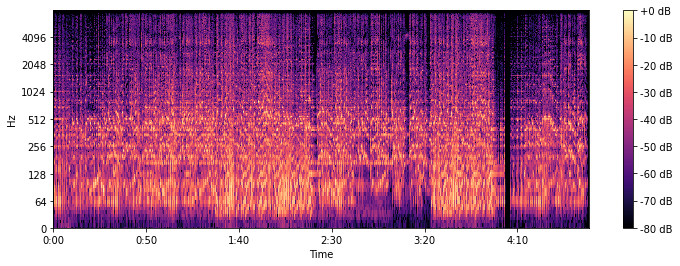

In [ ]:
import librosa.display

# Compute short-time Fourier Transform
x_stft = np.abs(librosa.stft(y))

# Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

# Plot STFT spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.show();

####As in all spectrogram plots, the color represents the amount (loudness/volume) of a given frequency, at a given timepoint. +0dB is the loudest, and -80dB is close to silence. On the horizontal x-axis we can see the time, while on the vertical y-axis we can see the different frequencies.

##1.3.2. Mel spectrogram
####As an alternative to the STFT, you can also compute the mel spectrogram, which is based on the mel scale. This scale accounts for the way we human perceive a sound's pitch. The mel scale is calculated so that two pairs of frequencies separated by a delta in the mel scale are perceived by humans as having the same perceptual difference.

####The mel spectrogram is computed very similar to the STFT, the main difference is just that the y-axis uses a different scale.

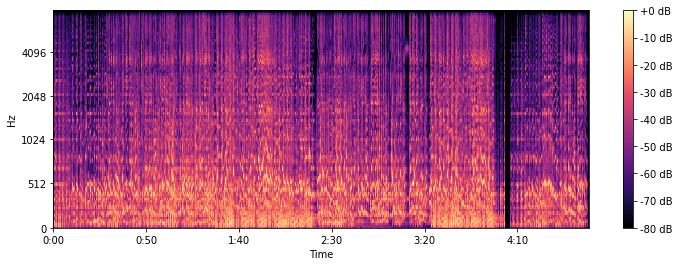

In [ ]:
# Compute the mel spectrogram
x_mel = librosa.feature.melspectrogram(y=y, sr=sr)

# Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
x_mel = librosa.power_to_db(x_mel, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(x_mel, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.show();

####The difference to the STFT might not be too obvious first, but if you take a closer look, you can see that in the STFT plot, the frequency from 0 to 512 Hz take much more space on the y-axis than in the mel plot.

##1.3.3. Mel-frequency cepstral coefficients (MFCCs)
####The Mel-frequency cepstral coefficients (MFCCs) are an alternative representation of the mel spectrogram from before. The advantage of the MFCCs over the mel-spectrogram are the rather small number of features (i.e. unique horizontal lines), usually ~20.

####Due to the fact that the mel spectrogram is closer to the way we human perceive pitch and that the MFCCs only has a few number of component features, most machine learning practitioner prefer the MFCCs way of representing audio data in an 'image way'. Which isn't to say that for a given problem an STFT, mel or waveform representation might work better.

####So, lets go ahead and compute the MFCCs and plot them.

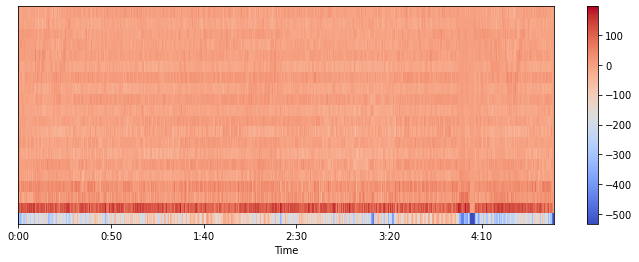

In [ ]:
# Extract 'n_mfcc' numbers of MFCCs components (here 20)
x_mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)

# Plot MFCCs
plt.figure(figsize=(12, 4))
librosa.display.specshow(x_mfccs, sr=sr, x_axis="time")
plt.colorbar()
plt.show();

#2. Data cleaning

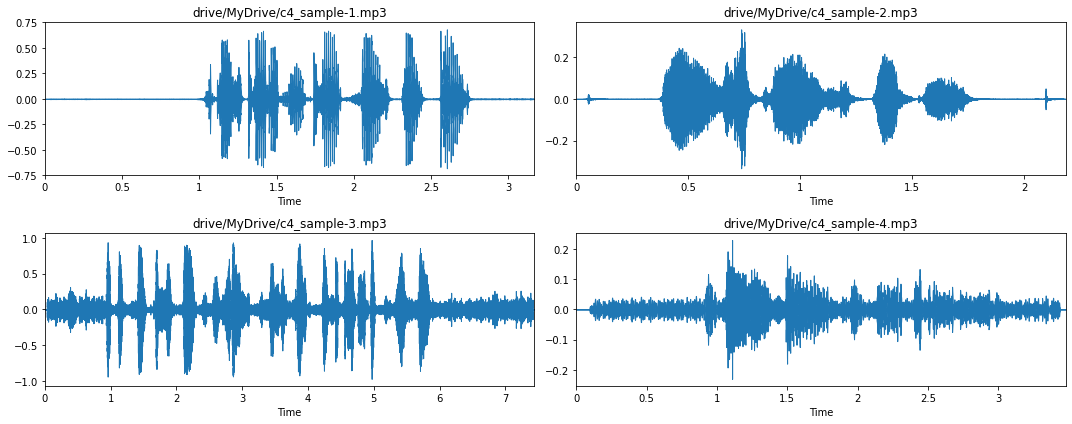

In [ ]:
# Visualization of four mp3 files
fig, axs = plt.subplots(2, 2, figsize=(15, 6))
for i, ax in enumerate(axs.flatten()):
    fname = "drive/MyDrive/c4_sample-%d.mp3" % (i + 1)
    y, sr = librosa.load(fname, sr=16_000)
    librosa.display.waveplot(y, sr=sr, ax=ax)
    ax.set_title(fname)
plt.tight_layout()
plt.show();

####From these four examples, and more importantly, when listening to them, we can gather a few more insights about this audio dataset:


1.   Most recordings have a long silence period at the beginning and the end of the recording (see sample 1 and 2). This is something we should take care of with 'trimming'.
2.   However, in some cases, these silence period are interrupted by a 'click', due to the pressing and releasing of the recording buttons (see sample 2).
3. Some audio recording don't have such silence phase, i.e. a straight line (see sample 3 and 4). When listening to these recordings we can observe that this is due to a lot of background noise.
####To better understand how this is represented in the frequency domain, let's look at the corresponding STFT spectrograms.









FileNotFoundError: ignored

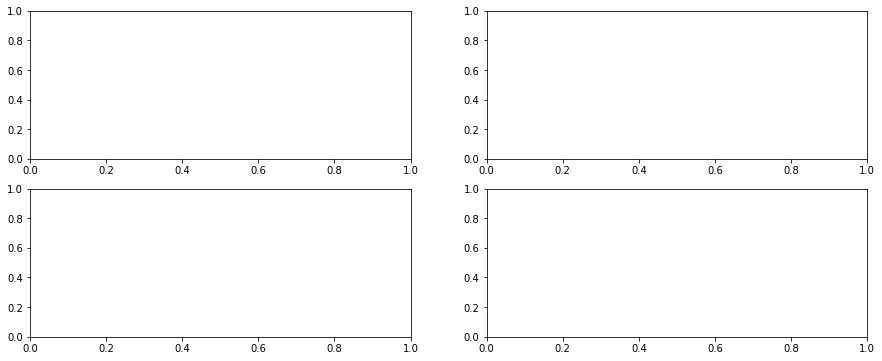

In [ ]:
# The code is the same as before, using the stft-spectrogram routine
fig, axs = plt.subplots(2, 2, figsize=(15, 6))
for i, ax in enumerate(axs.flatten()):
    fname = "c4_sample-%d.mp3" % (i + 1)
    y, sr = librosa.load(fname, sr=16_000)
    x_stft = np.abs(librosa.stft(y))
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(fname)
plt.tight_layout()
plt.show();

####When we listen to the audio recordings we can observe that sample 3 has varying background noise covering multiple frequencies, while the background noise in sample 4 is rather constant. This is also what we see in the figures above. Sample 3 is very noisy throughout, while sample 4 is noisy only on a few frequencies (i.e. the thick horizontal lines). For now we won't go into detail of how such noise could be removed, as this would be beyond the scope of this article.

####So, let's look into a 'short-cut' of how we could remove such noise, and trim the audio samples. While a more manual approach, using custom filtering functions, might be the best approach to remove noise from audio data, in our case we will go ahead and use the practical python package noisereduce.

In [ ]:
import noisereduce as nr
from scipy.io import wavfile

# Loop through all four samples
for i in range(4):

    # Load audio file
    fname = "c4_sample-%d.mp3" % (i + 1)
    y, sr = librosa.load(fname, sr=16_000)

    # Remove noise from audio sample
    reduced_noise = nr.reduce_noise(y=y, sr=sr, stationary=False)

    # Save output in a wav file as mp3 cannot be saved to directly
    wavfile.write(fname.replace(".mp3", ".wav"), sr, reduced_noise)

ModuleNotFoundError: ignored